In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classical Transformer with original data

In [11]:
data1=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc/results_grid_search_cc.csv')

In [22]:
data1.head(5)

,idx,learning_rate,hidden_size,dropout,num_head,num_transf,mlp_size,patch_size,weight_decay,test_auc,test_acc,val_auc,val_acc
0,0,0.0025,64,0.15,4,1,6,4,1.000000e-07,91.035080,72.618454,92.063763,73.678963
1,1,0.0025,64,0.15,4,1,6,4,1.000000e-07,90.707855,72.817955,91.828657,73.678963
2,2,0.0025,64,0.15,4,1,6,4,1.000000e-07,90.699340,72.718204,92.198091,73.479561
3,3,0.0025,64,0.15,4,1,6,4,1.000000e-07,91.299499,72.369077,91.853854,73.579262
4,4,0.0025,64,0.15,4,1,6,4,1.000000e-07,90.898576,73.316708,92.094535,74.476570


In [13]:
max_value = data1['test_auc'].max()
print(max_value)
max_ind = data1['test_auc'].idxmax()
max_row = data1.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

91.52792953698616
Fila con el valor máximo en test_auc:
idx              1.900000e+01
learning_rate    2.500000e-03
hidden_size      6.400000e+01
dropout          1.500000e-01
num_head         4.000000e+00
num_transf       1.000000e+00
mlp_size         6.000000e+00
patch_size       4.000000e+00
weight_decay     1.000000e-07
test_auc         9.152793e+01
test_acc         7.371571e+01
val_auc          9.243154e+01
val_acc          7.497507e+01
Name: 19, dtype: float64


In [14]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [15]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

In [16]:
def plot_training(training):
    # Assuming these lists contain the training loss and AUC values for each epoch
    train_loss = training['trainlosslist']  # List of loss values
    train_auc = training['trauclist']   
    test_loss = training['vallosslist']  # List of loss values
    test_auc = training['auclist']  
    
    # Crear la figura con dos subgráficos (dos filas, una columna)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Gráfico de pérdida (loss)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(range(1, len(train_loss) + 1), train_loss, color='tab:red', label='Train Loss')
    ax1.plot(range(1, len(test_loss) + 1), test_loss, color='tab:orange', label='Test Loss', linestyle='--')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.legend(loc="upper right")
    ax1.set_title('Training and Test Loss over Epochs')
    
    # Gráfico de AUC
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('AUC', color='tab:blue')
    ax2.plot(range(1, len(train_auc) + 1), train_auc, color='tab:blue', label='Train AUC')
    ax2.plot(range(1, len(test_auc) + 1), test_auc, color='tab:cyan', label='Test AUC', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.legend(loc="lower right")
    ax2.set_title('Training and Test AUC over Epochs')
    
    # Ajustar el diseño para evitar superposición
    plt.tight_layout()
    
    # Mostrar los gráficos
    plt.show()

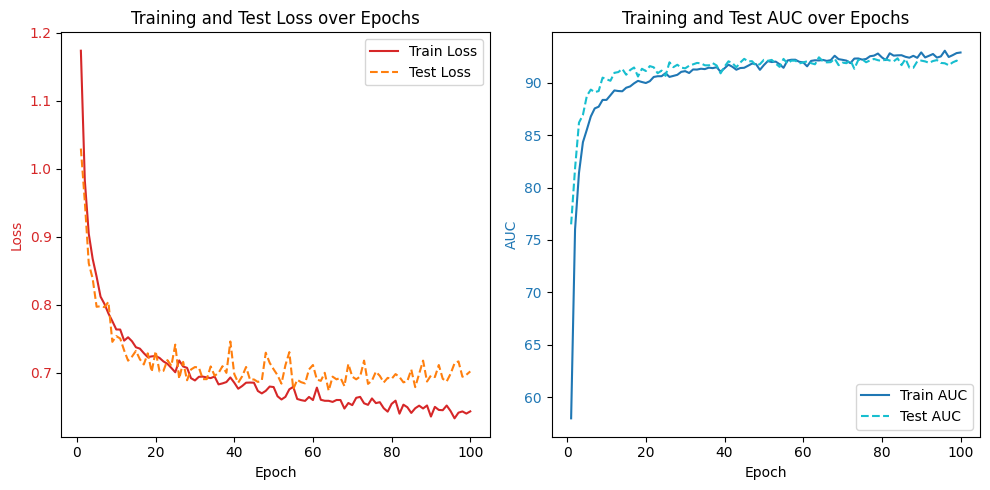

In [17]:
plot_training(training)

In [18]:
def plot_hist(data1):
    # Crear el histograma
    #data = data1[(data1['learning_rate'] == lr) & (data1['hidden_size'] == hs) & (data1['dropout'] == dr) & (data1['num_head'] == nh)]
    plt.hist(data1['test_auc'], bins=20)
    plt.title("Test AUC of different runs with the same hyperparams as the best result")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.show()

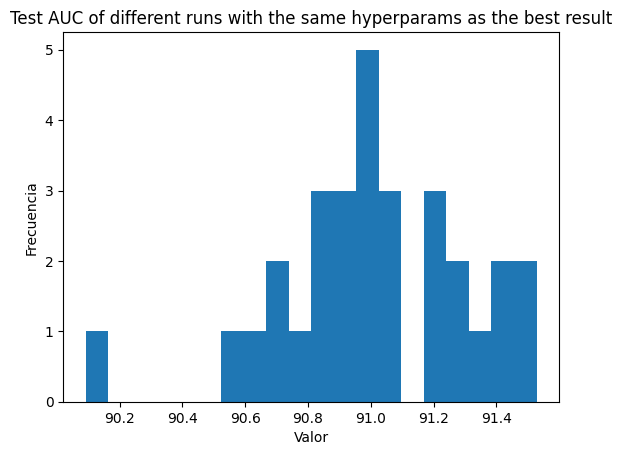

In [19]:
plot_hist(data1)

### Learning rate

In [20]:
def plot_variable(data1,var):
    # Create a violin plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    # Primer violín: Test AUC
    sns.violinplot(ax=axes[0], x=f'{var}', y='test_auc', hue=f'{var}', data=data1, palette="pastel")
    axes[0].set_title(f"Test AUC vs {var}")
    axes[0].set_ylabel("AUC")
    
    # Segundo violín: Validation AUC
    sns.violinplot(ax=axes[1], x=f'{var}', y='val_auc', hue=f'{var}', data=data1, palette="pastel")
    axes[1].set_title(f"Validation AUC vs {var}")
    axes[1].set_ylabel("AUC")
    
    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()


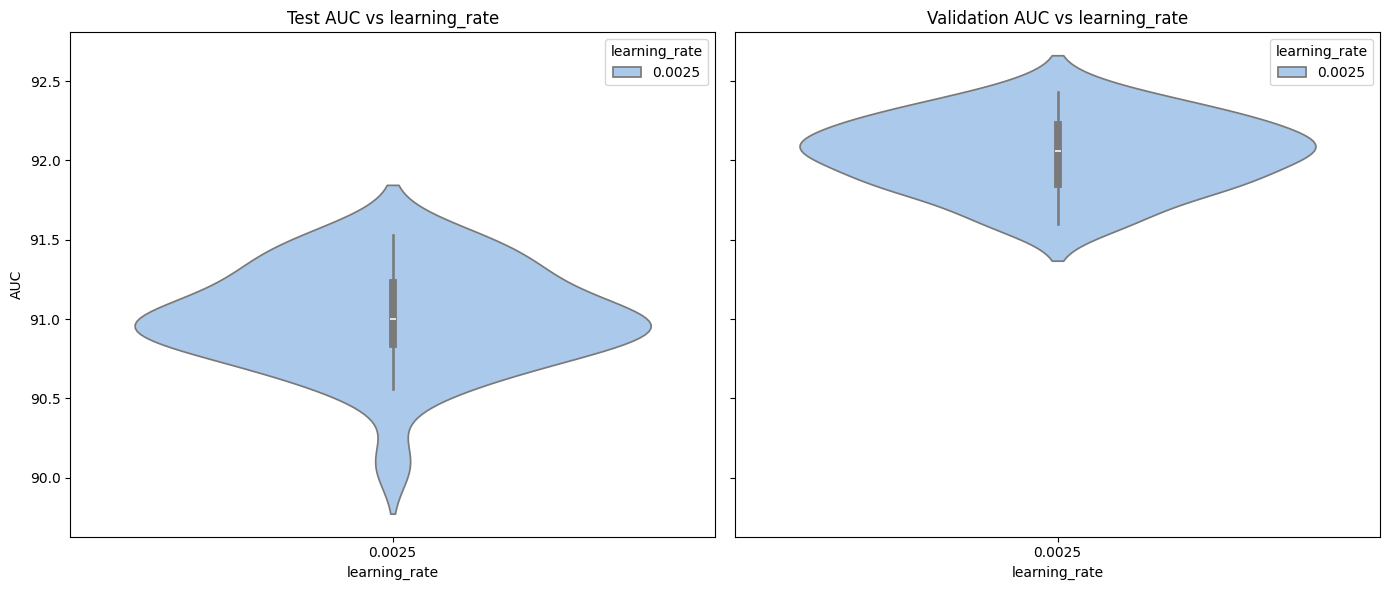

In [21]:
plot_variable(data1, var='learning_rate')

### Dropout

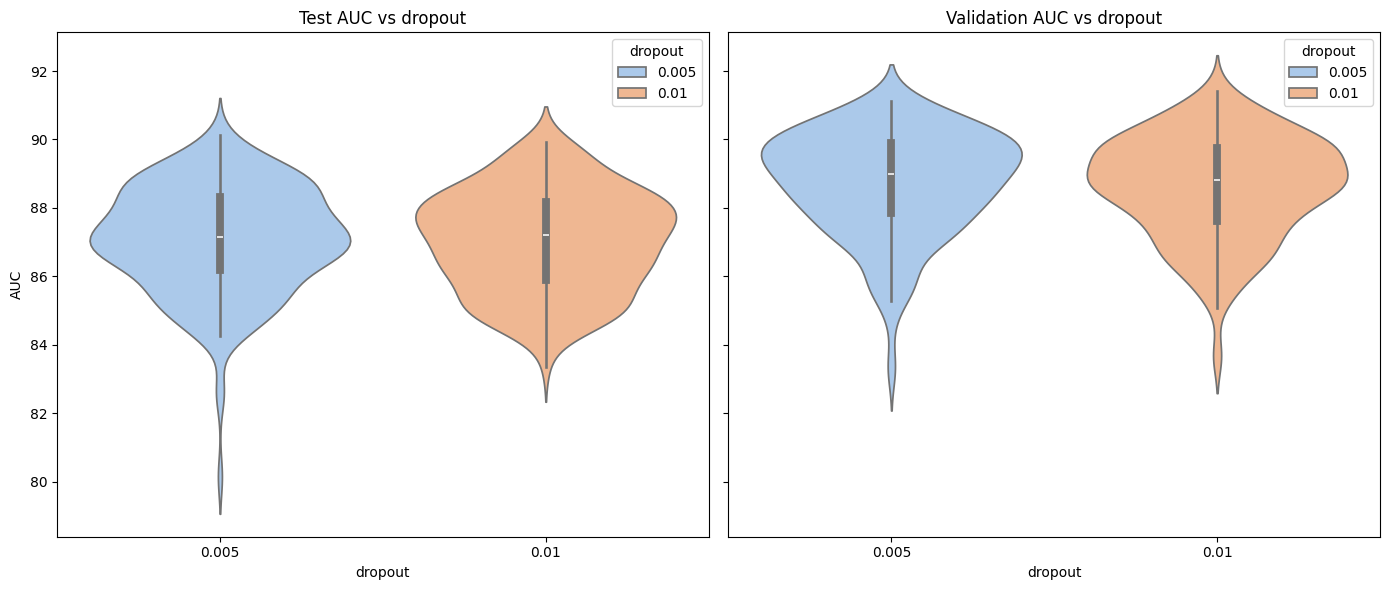

In [13]:
plot_variable(data1, var='dropout')

### Weight decay

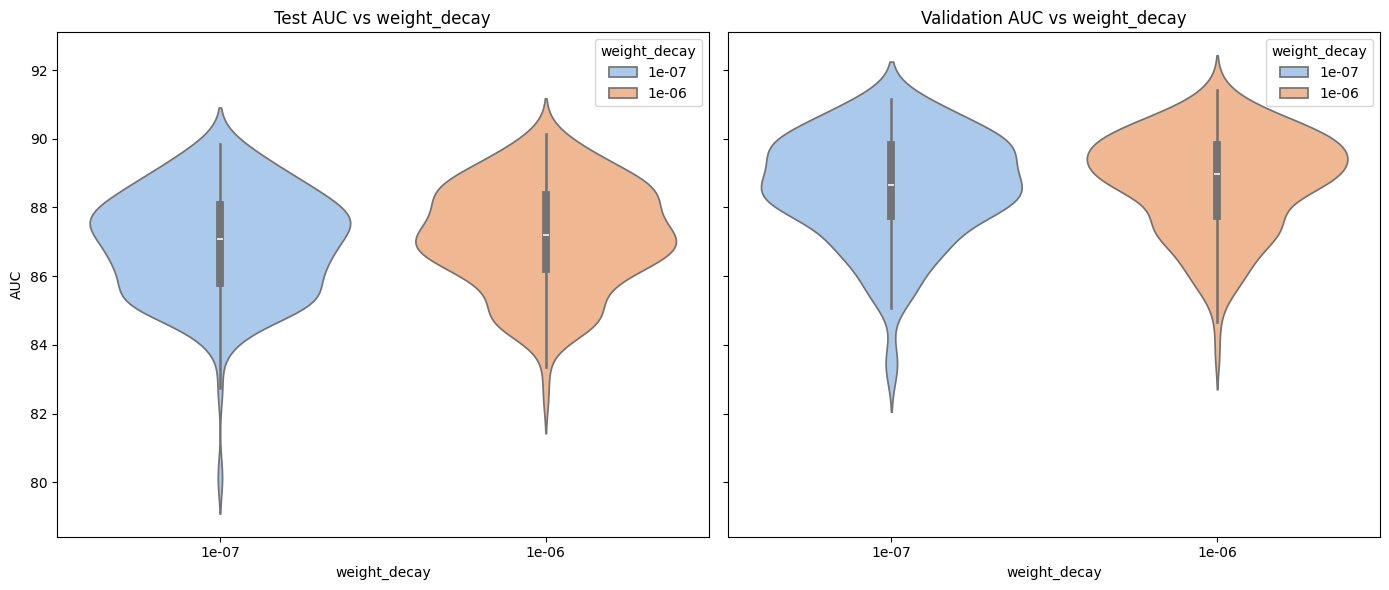

In [14]:
plot_variable(data1, var='weight_decay')

### Num of heads

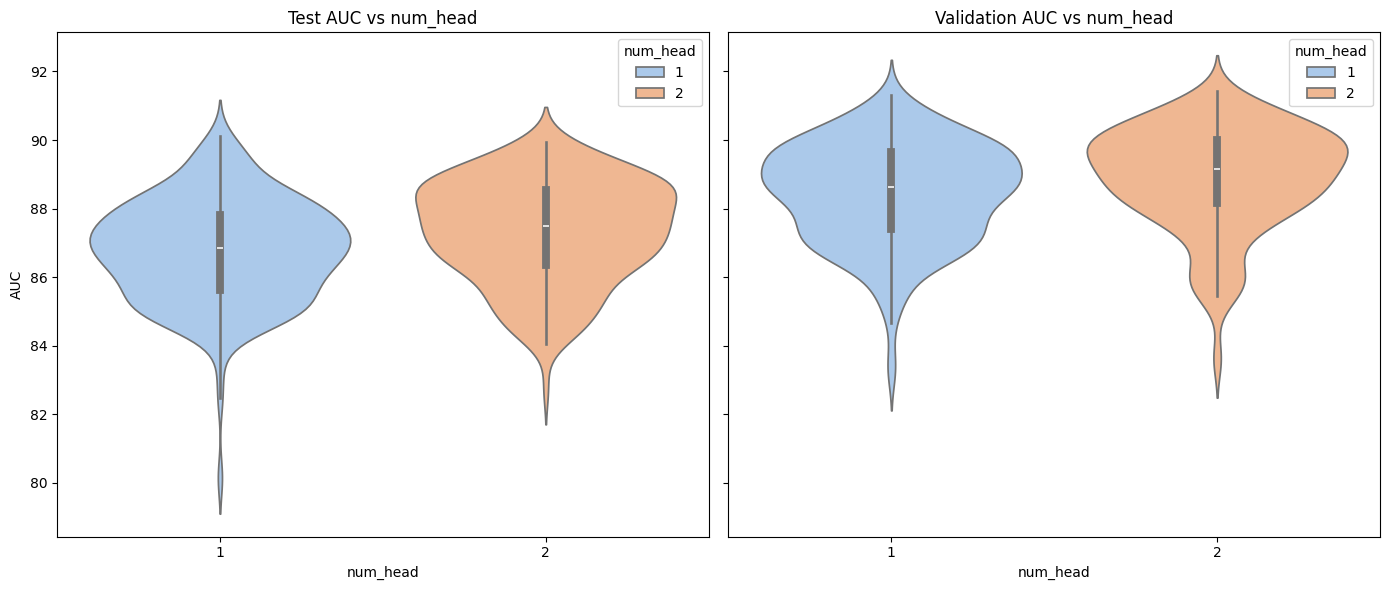

In [15]:
plot_variable(data1, var='num_head')

### Num Transformer blocks

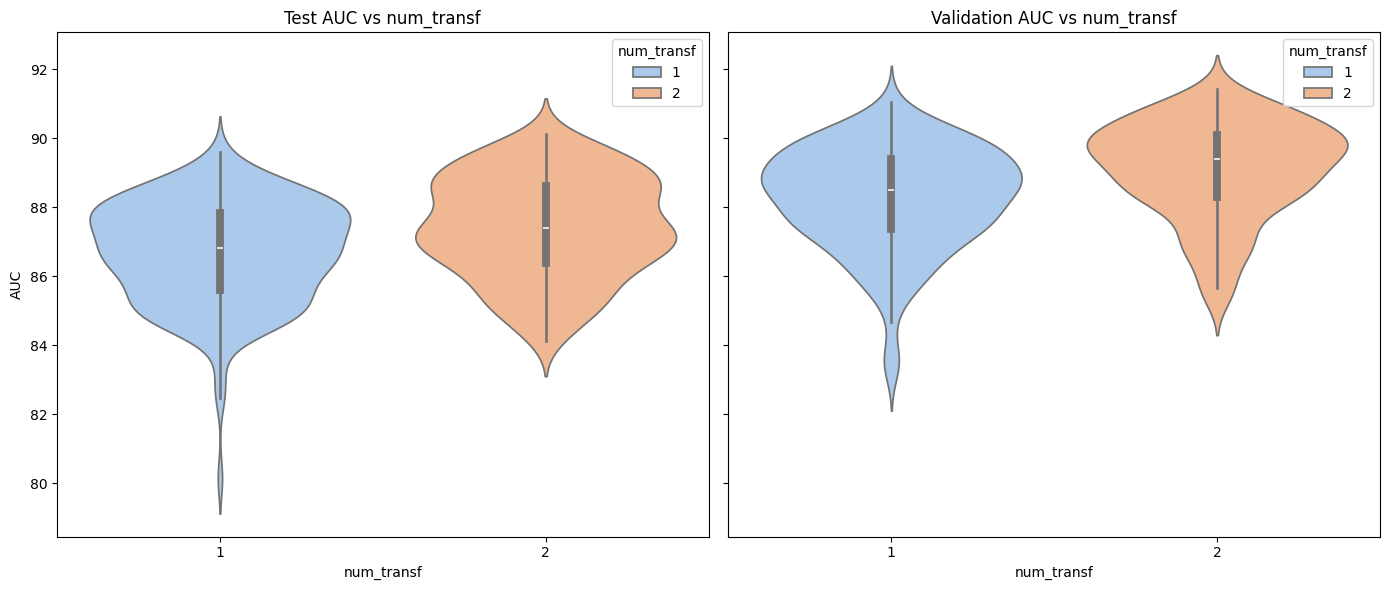

In [16]:
plot_variable(data1, var='num_transf')

### MLP size

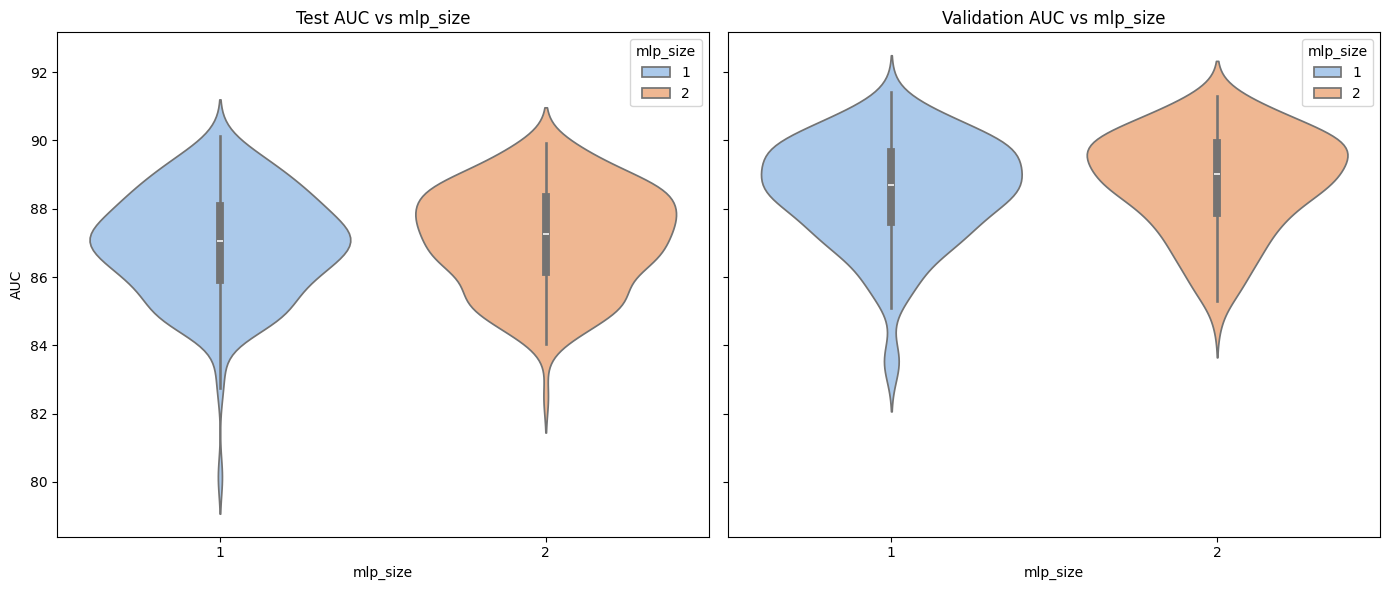

In [17]:
plot_variable(data1, var='mlp_size')

### Patch size

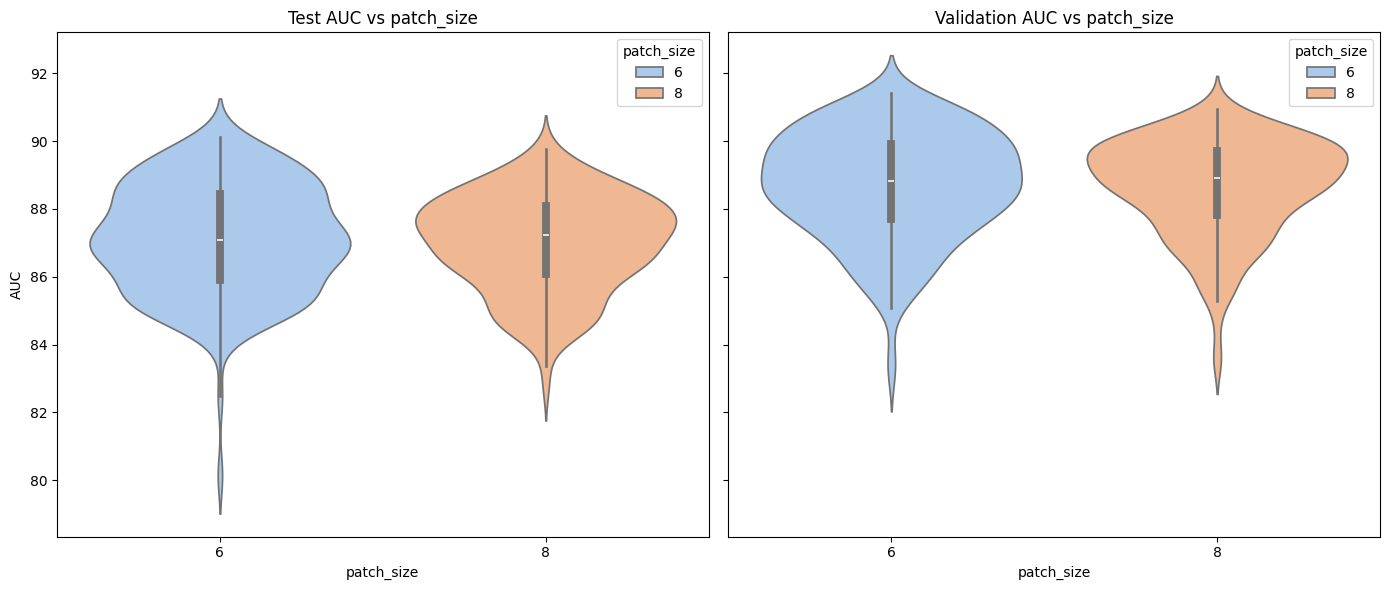

In [18]:
plot_variable(data1, var='patch_size')

## Refined

In [19]:
data12=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined/results_grid_search_cc.csv')

In [20]:
max_value = data12['test_auc'].max()
print(max_value)
max_ind = data12['test_auc'].idxmax()
max_row = data12.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

90.9502839080795
Fila con el valor máximo en test_auc:
idx              1.100000e+01
learning_rate    7.000000e-04
hidden_size      8.000000e+00
dropout          5.000000e-03
num_head         2.000000e+00
num_transf       3.000000e+00
mlp_size         1.000000e+00
patch_size       6.000000e+00
weight_decay     1.000000e-07
test_auc         9.095028e+01
test_acc         7.291771e+01
val_auc          9.205704e+01
val_acc          7.517448e+01
Name: 47, dtype: float64


In [21]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [22]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

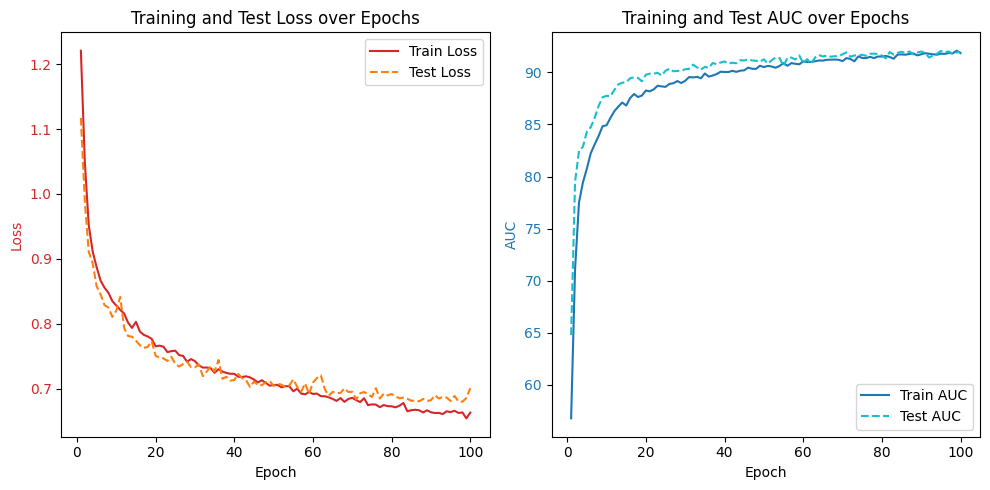

In [23]:
plot_training(training)

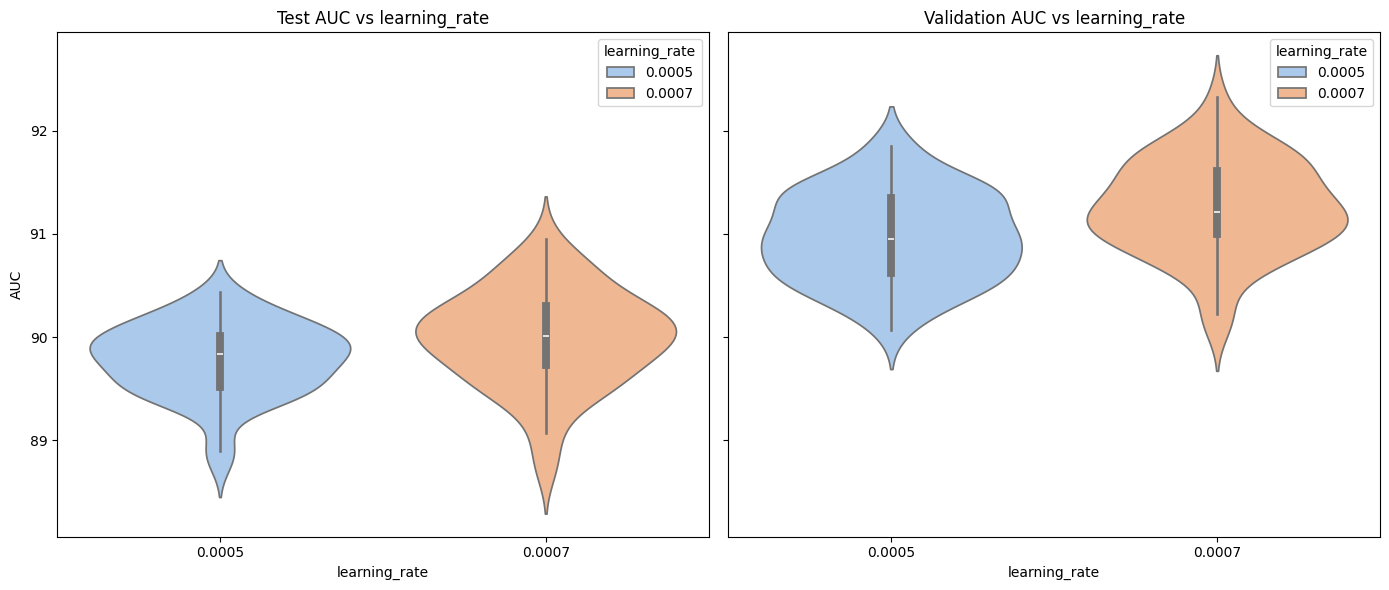

In [24]:
plot_variable(data12, var='learning_rate')

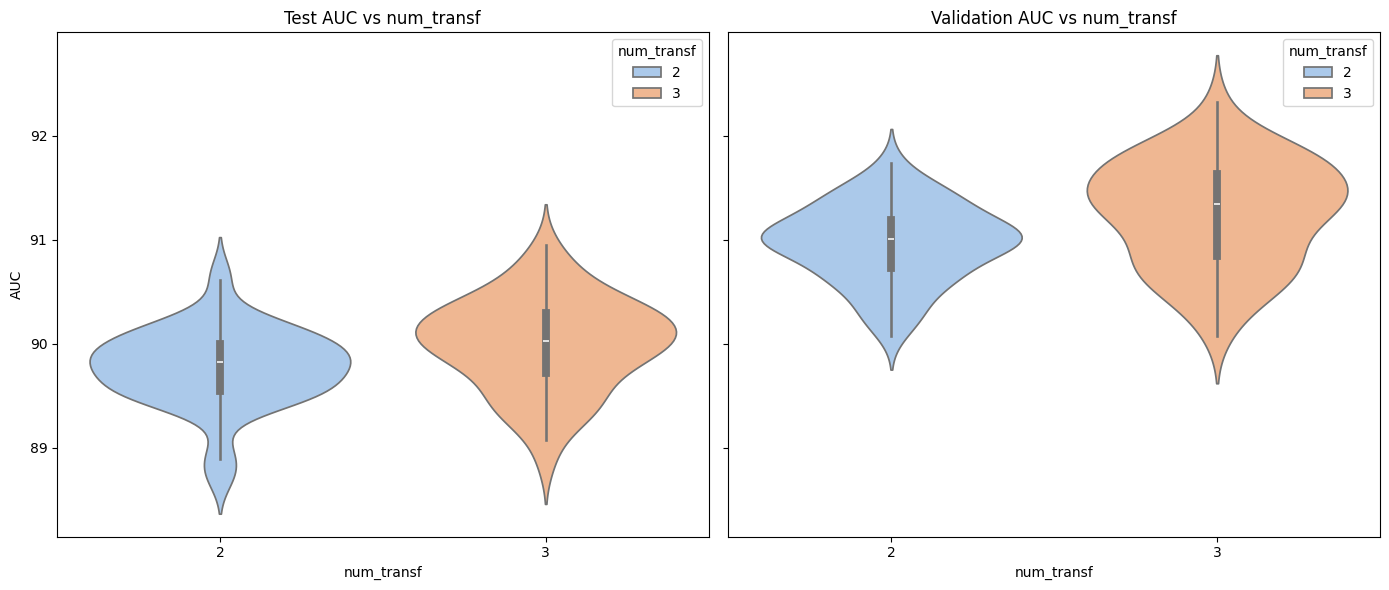

In [25]:
plot_variable(data12, var='num_transf')

## Increasing learning rate and transformer blocks

In [26]:
data13=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined2/results_grid_search_cc.csv')

In [27]:
max_value = data13['test_auc'].max()
print(max_value)
max_ind = data13['test_auc'].idxmax()
max_row = data13.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

91.02193974737048
Fila con el valor máximo en test_auc:
idx              5.000000e+00
learning_rate    1.000000e-03
hidden_size      8.000000e+00
dropout          5.000000e-03
num_head         2.000000e+00
num_transf       3.000000e+00
mlp_size         1.000000e+00
patch_size       6.000000e+00
weight_decay     1.000000e-07
test_auc         9.102194e+01
test_acc         7.361596e+01
val_auc          9.176142e+01
val_acc          7.357926e+01
Name: 22, dtype: float64


In [28]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [29]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined2/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

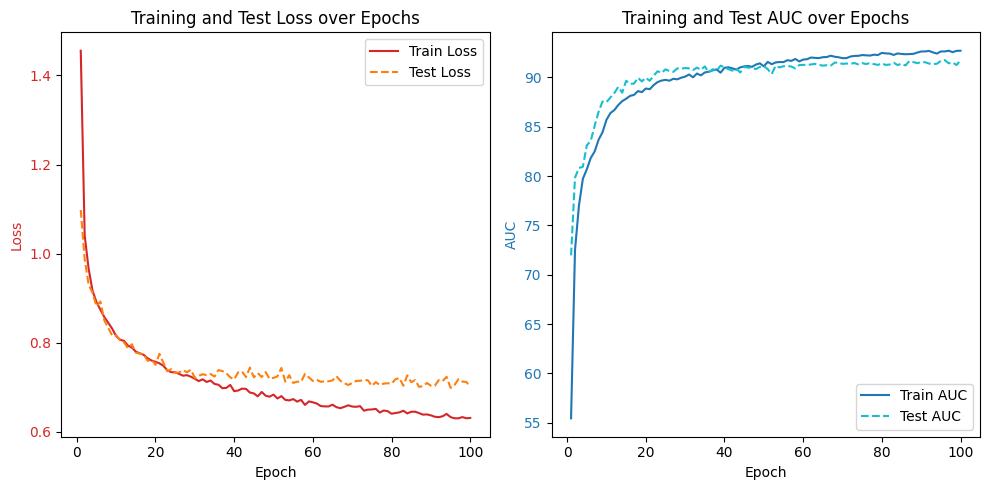

In [30]:
plot_training(training)

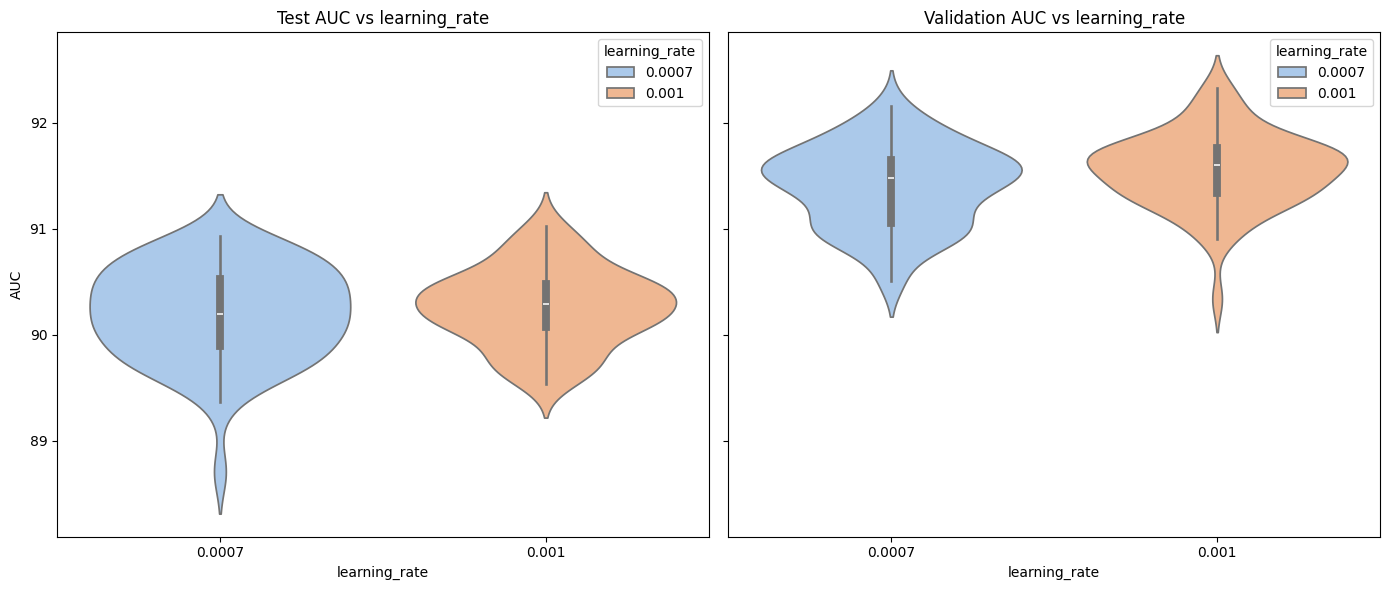

In [31]:
plot_variable(data13, var='learning_rate')

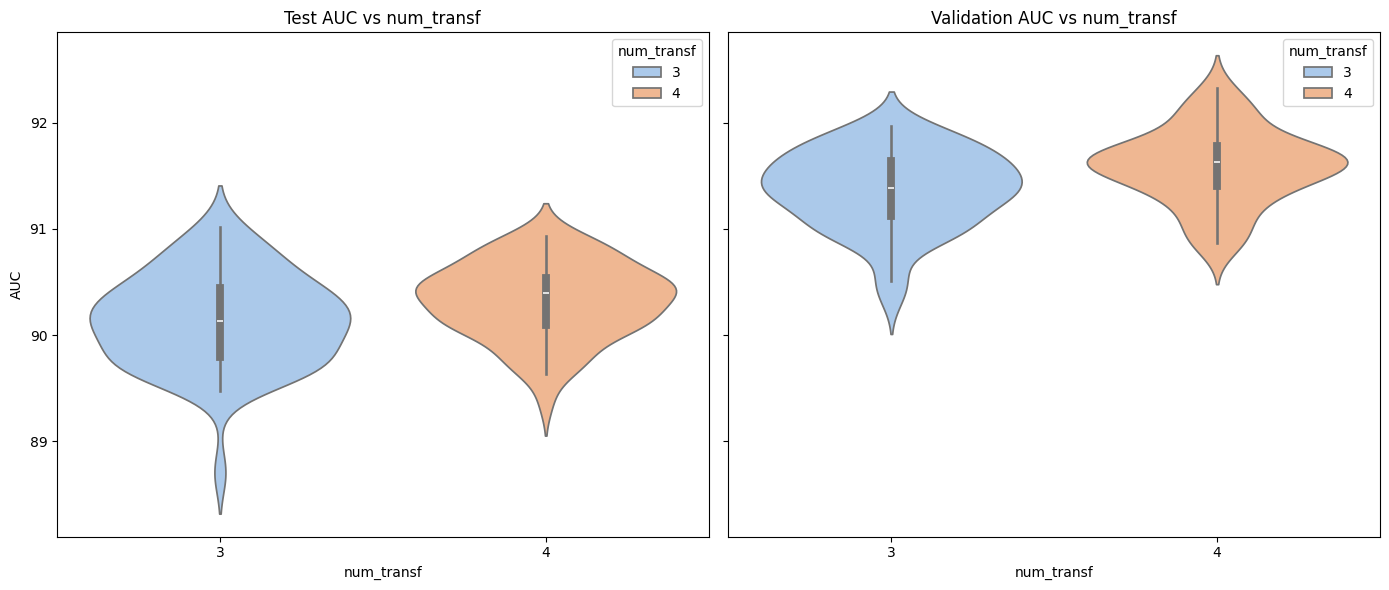

In [32]:
plot_variable(data13, var='num_transf')

## Increasing learning rate, number of heads and transformer blocks

In [33]:
data14=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined3/results_grid_search_cc.csv')

In [34]:
max_value = data14['test_auc'].max()
print(max_value)
max_ind = data14['test_auc'].idxmax()
max_row = data14.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

91.34512025793516
Fila con el valor máximo en test_auc:
idx              1.400000e+01
learning_rate    1.000000e-03
hidden_size      8.000000e+00
dropout          5.000000e-03
num_head         4.000000e+00
num_transf       4.000000e+00
mlp_size         1.000000e+00
patch_size       6.000000e+00
weight_decay     1.000000e-07
test_auc         9.134512e+01
test_acc         7.371571e+01
val_auc          9.265763e+01
val_acc          7.497507e+01
Name: 115, dtype: float64


In [35]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [36]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined3/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

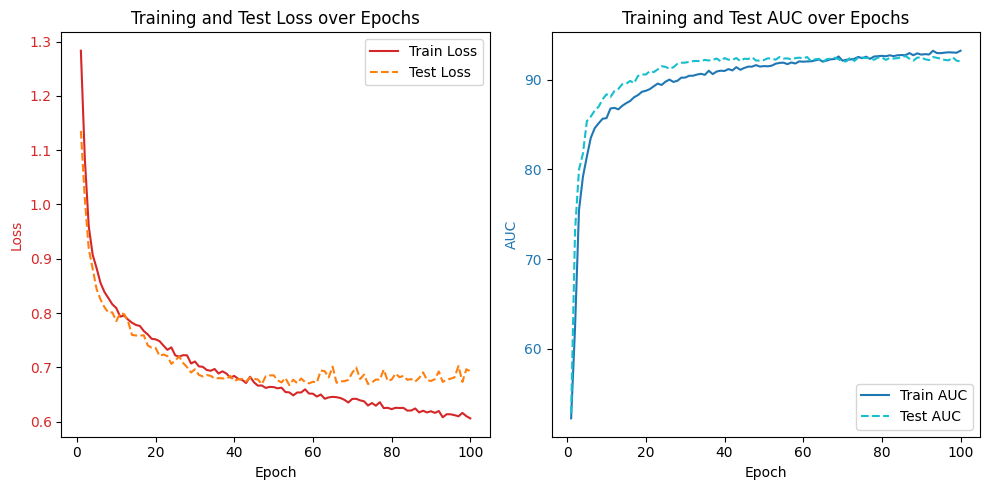

In [37]:
plot_training(training)

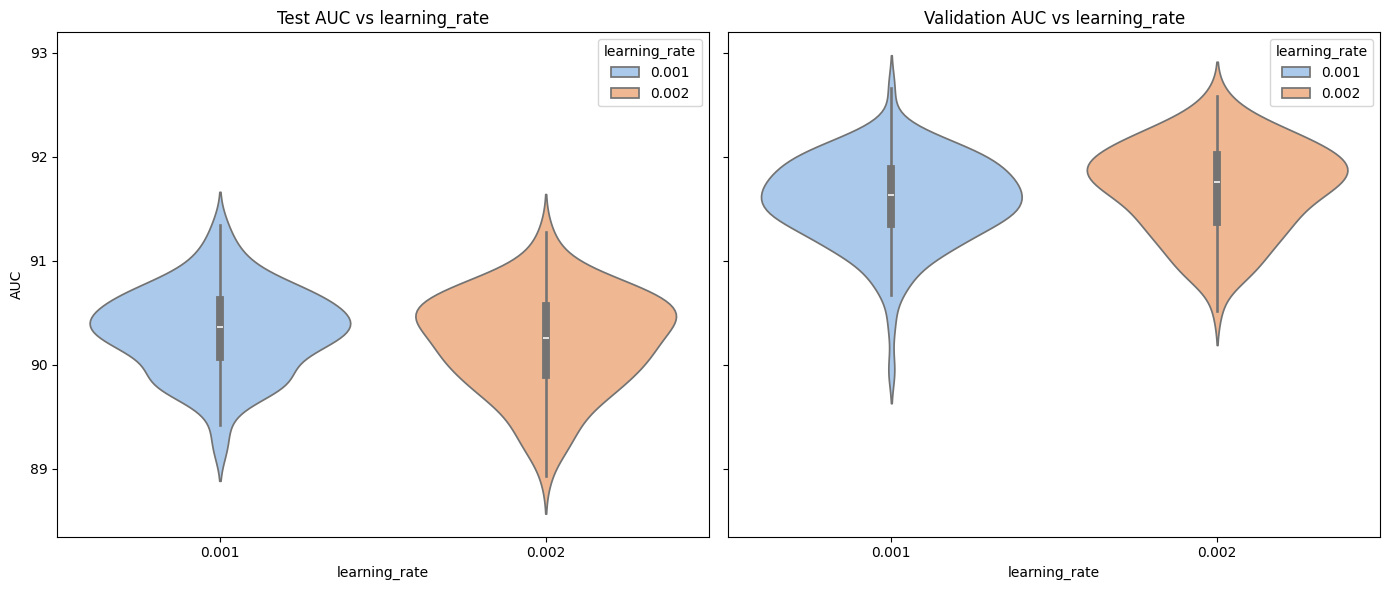

In [38]:
plot_variable(data14, var='learning_rate')

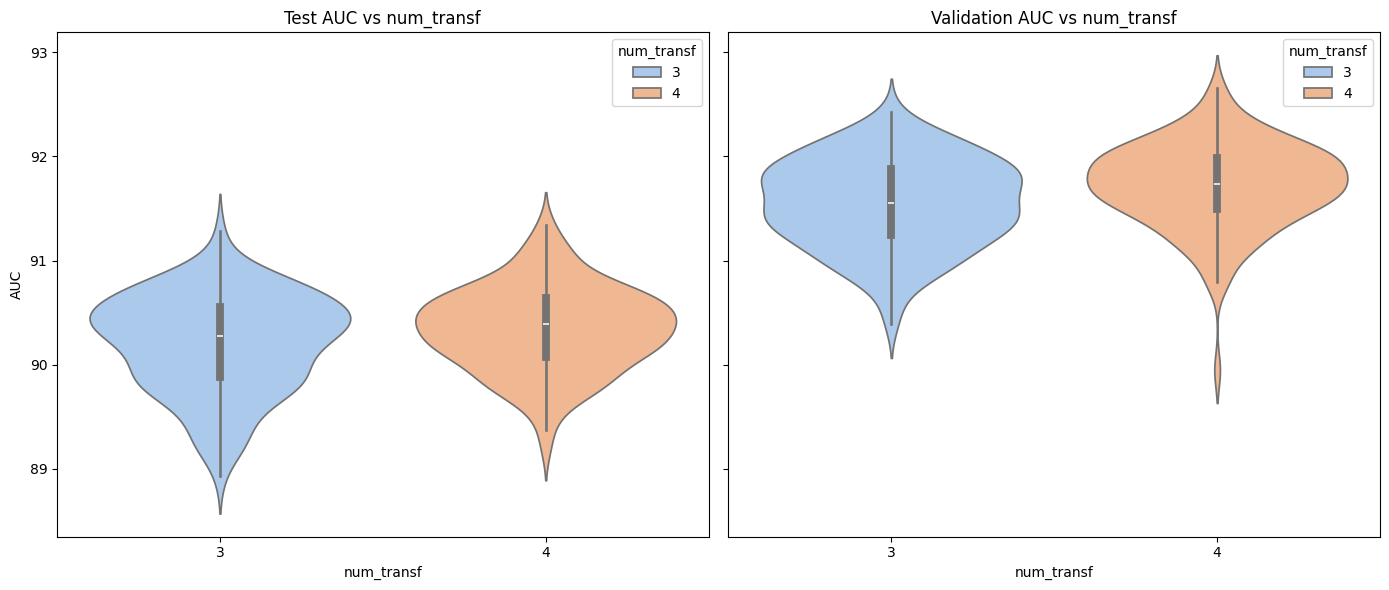

In [39]:
plot_variable(data14, var='num_transf')

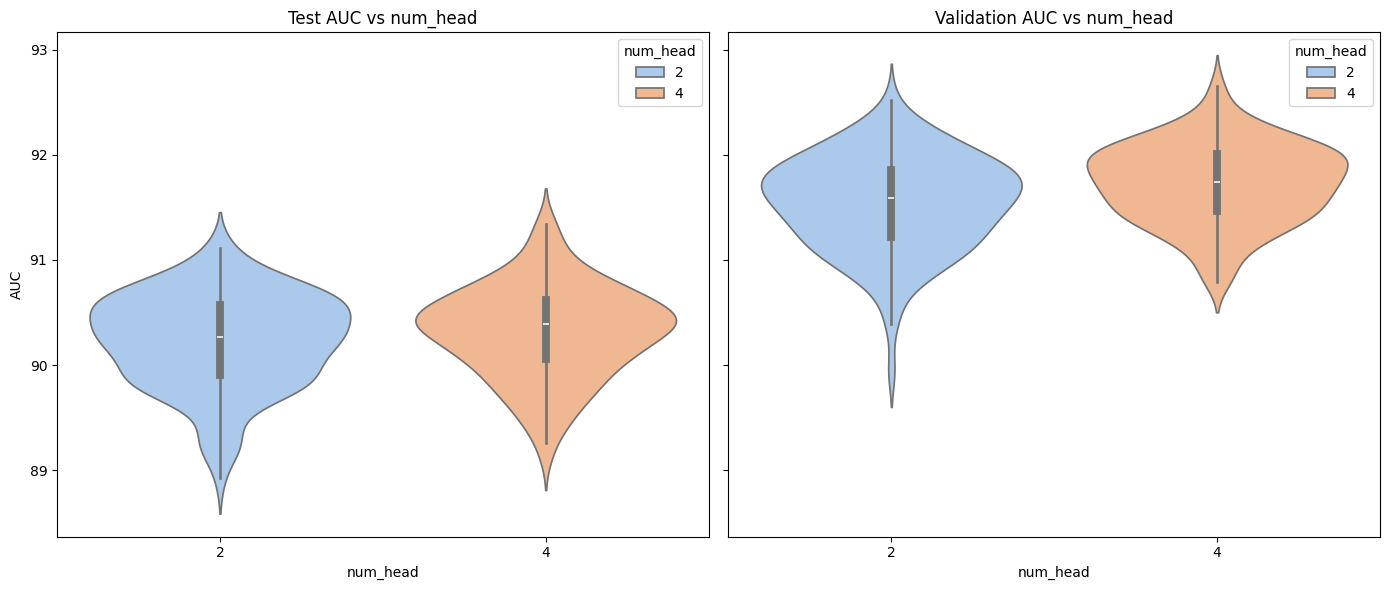

In [40]:
plot_variable(data14, var='num_head')

## Increasing transformer blocks, weight decay, dropout and batch size

In [41]:
data15=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined4/results_grid_search_cc.csv')

In [42]:
max_value = data15['test_auc'].max()
print(max_value)
max_ind = data15['test_auc'].idxmax()
max_row = data15.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

91.15679809005302
Fila con el valor máximo en test_auc:
idx              14.000000
learning_rate     0.001000
hidden_size       8.000000
dropout           0.007000
num_head          4.000000
num_transf        4.000000
mlp_size          1.000000
patch_size        6.000000
weight_decay      0.000001
test_auc         91.156798
test_acc         72.768080
val_auc          92.298513
val_acc          75.074776
Name: 28, dtype: float64


In [43]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [44]:
#training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cc_refined3/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

In [45]:
#plot_training(training)

In [46]:
#plot_variable(data14, var='num_transf')

## Obtain attention masks from the best model

# Quantum Transformer with original data

In [47]:
data2=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined4/results_grid_search_cq.csv')
data2.head()

,idx,learning_rate,hidden_size,dropout,num_head,num_transf,mlp_size,patch_size,weight_decay,test_auc,test_acc,val_auc,val_acc
0,0,0.002,128,0.2,4,4,4,4,1.000000e-07,90.888237,73.167082,91.787940,72.283151
1,0,0.002,128,0.2,4,4,4,6,1.000000e-07,90.875297,72.119701,91.732866,72.681954
2,0,0.002,128,0.2,4,4,6,4,1.000000e-07,90.986703,73.815461,92.579535,75.274177
3,0,0.002,128,0.2,4,4,6,6,1.000000e-07,91.033726,71.870324,91.773635,72.083749
4,0,0.002,128,0.2,4,4,8,4,1.000000e-07,91.095037,73.865337,92.314339,71.784646


In [48]:
max_value = data2['test_auc'].max()
print(max_value)
max_ind = data2['test_auc'].idxmax()
max_row = data2.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

92.2521030911895
Fila con el valor máximo en test_auc:
idx              0.000000e+00
learning_rate    2.000000e-03
hidden_size      6.400000e+01
dropout          2.000000e-01
num_head         4.000000e+00
num_transf       4.000000e+00
mlp_size         8.000000e+00
patch_size       4.000000e+00
weight_decay     1.000000e-07
test_auc         9.225210e+01
test_acc         7.286783e+01
val_auc          9.271186e+01
val_acc          7.168495e+01
Name: 12, dtype: float64


In [49]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [50]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined4/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

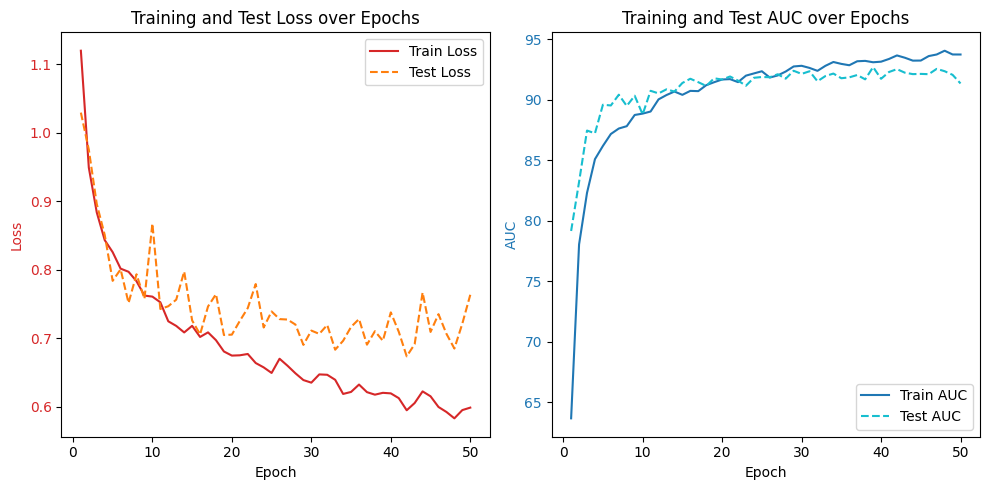

In [51]:
plot_training(training)

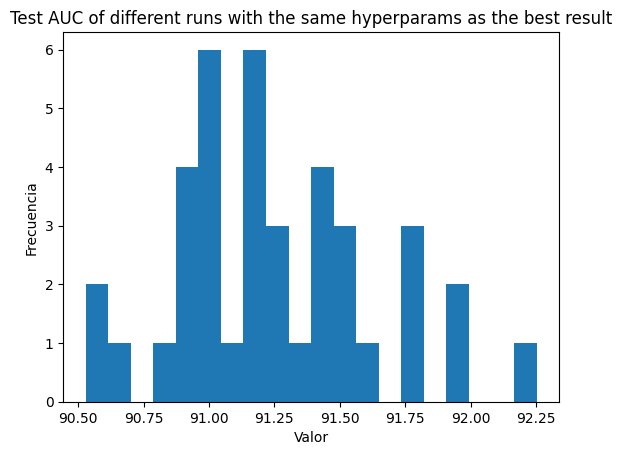

In [52]:
plot_hist(data2)

### Patch size

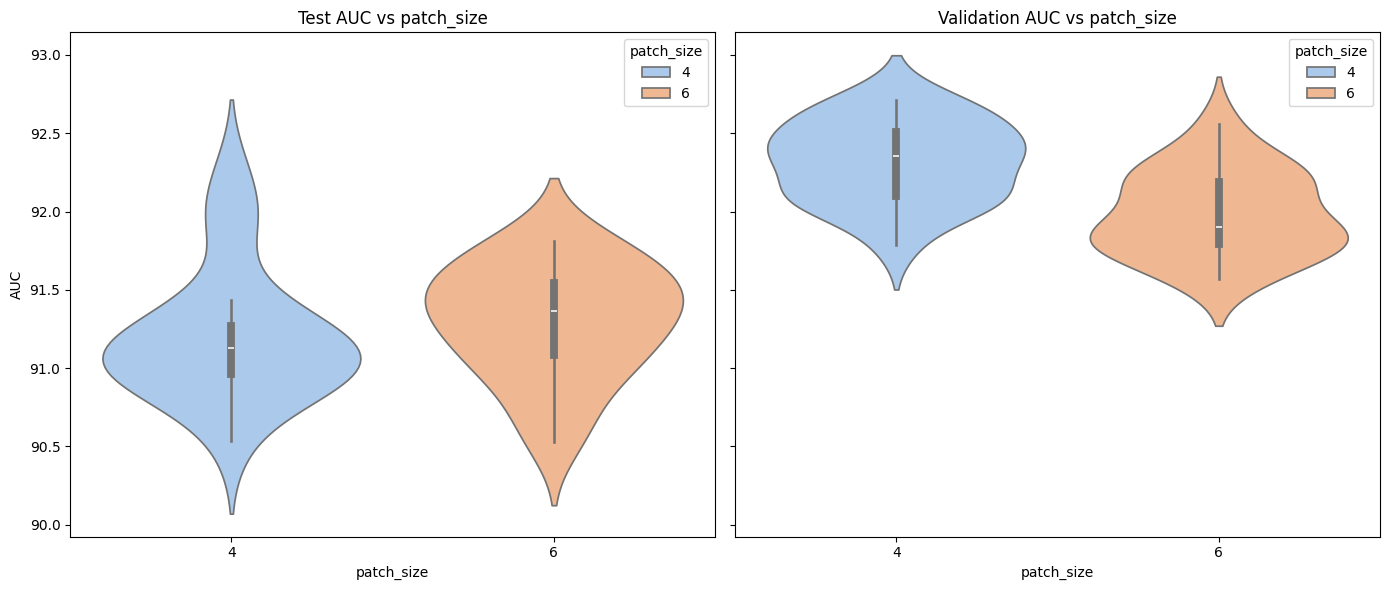

In [53]:
plot_variable(data2, var='patch_size')

### Hidden size

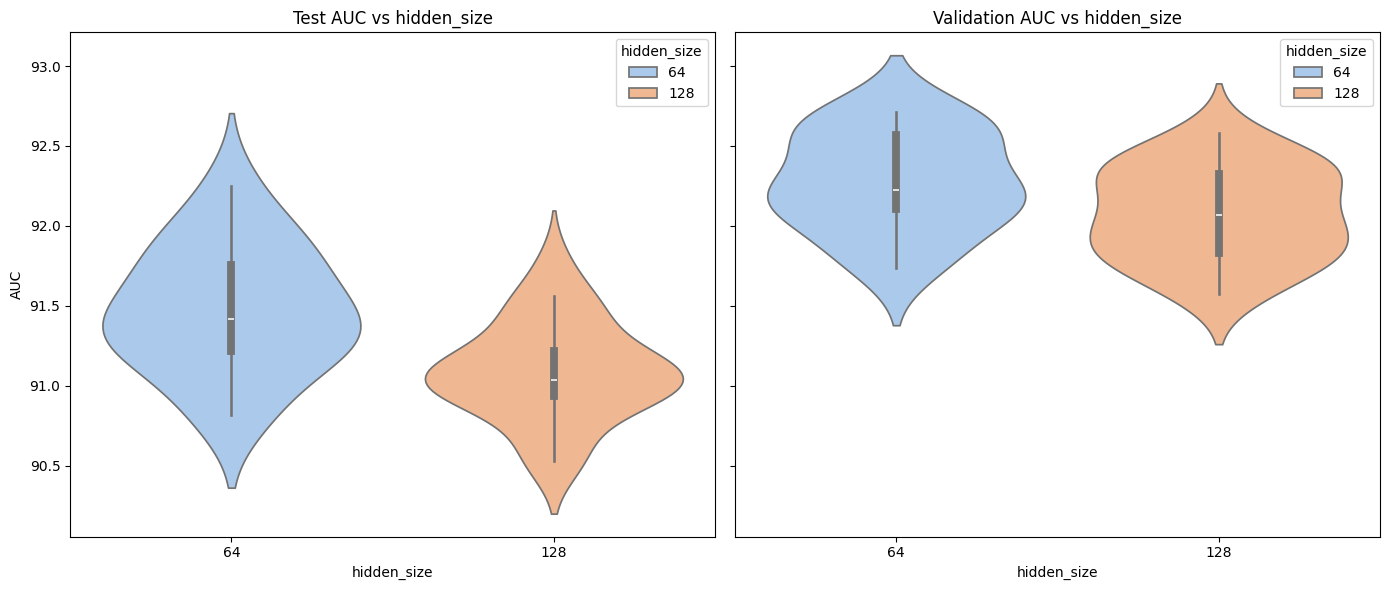

In [54]:
plot_variable(data2, var='hidden_size')

### MLP size

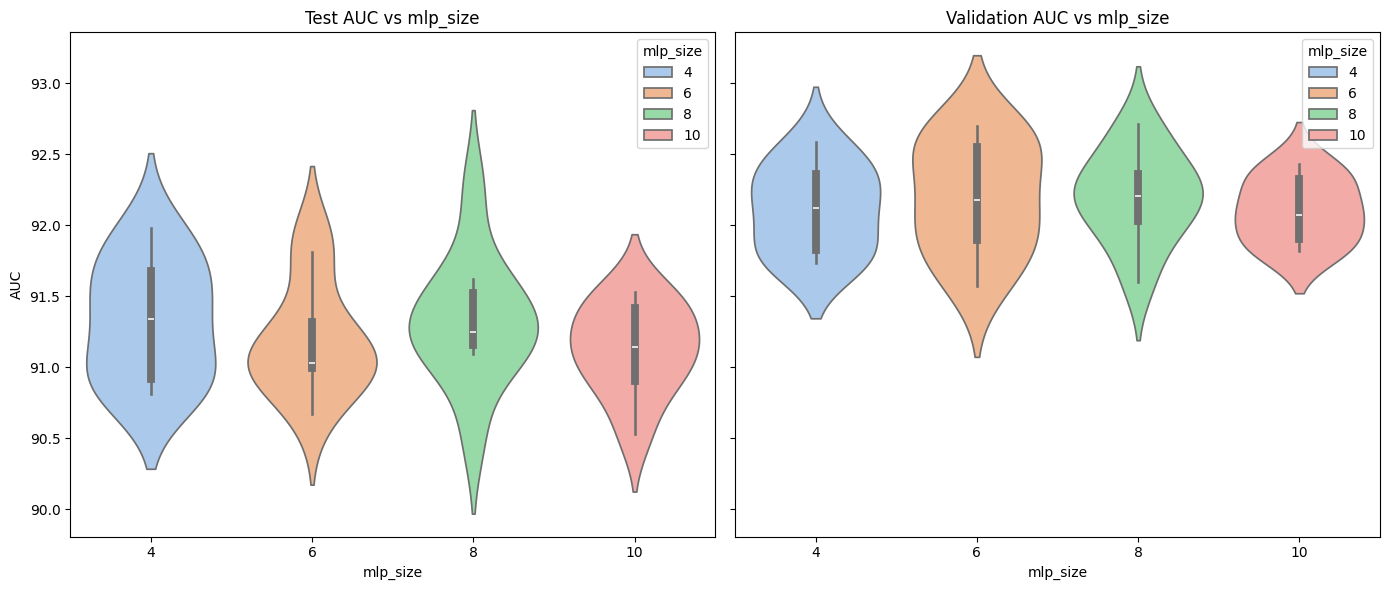

In [55]:
plot_variable(data2, var='mlp_size')

## Refined_5

In [56]:
data22=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined5/results_grid_search_cq.csv')
data22

,idx,learning_rate,hidden_size,dropout,num_head,num_transf,mlp_size,patch_size,weight_decay,test_auc,test_acc,val_auc,val_acc
0,0,0.0020,32,0.15,2,4,4,4,1.000000e-07,91.300548,74.014963,92.405436,73.180459
1,0,0.0020,32,0.15,2,4,4,6,1.000000e-07,90.961992,73.416459,92.188910,74.277168
2,0,0.0020,32,0.15,2,4,6,4,1.000000e-07,91.035881,74.513716,92.267550,75.274177
3,0,0.0020,32,0.15,2,4,6,6,1.000000e-07,91.132599,73.316708,91.914183,74.775673
4,0,0.0020,32,0.15,2,6,4,4,1.000000e-07,91.176616,73.067332,92.334309,75.074776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2,0.0025,32,0.20,4,4,4,4,1.000000e-07,91.893033,75.012469,92.342632,73.778664
334,2,0.0025,32,0.20,4,4,4,6,1.000000e-07,91.049143,74.463840,92.399226,75.074776
335,2,0.0025,32,0.20,4,4,6,4,1.000000e-07,90.807621,73.466334,92.098707,74.476570
336,2,0.0025,32,0.20,4,4,6,6,1.000000e-07,91.520318,73.067332,92.101992,73.778664


In [57]:
max_value = data22['test_auc'].max()
print(max_value)
max_ind = data22['test_auc'].idxmax()
max_row = data22.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

92.21941781787336
Fila con el valor máximo en test_auc:
idx              0.000000e+00
learning_rate    2.500000e-03
hidden_size      6.400000e+01
dropout          1.500000e-01
num_head         4.000000e+00
num_transf       4.000000e+00
mlp_size         4.000000e+00
patch_size       4.000000e+00
weight_decay     1.000000e-07
test_auc         9.221942e+01
test_acc         7.486284e+01
val_auc          9.227082e+01
val_acc          7.457627e+01
Name: 152, dtype: float64


In [58]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [59]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined5/grid_search{index}/Training_{"{:.4f}".format(lr)}_{int(hs)}_{"{:.2f}".format(dr)}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

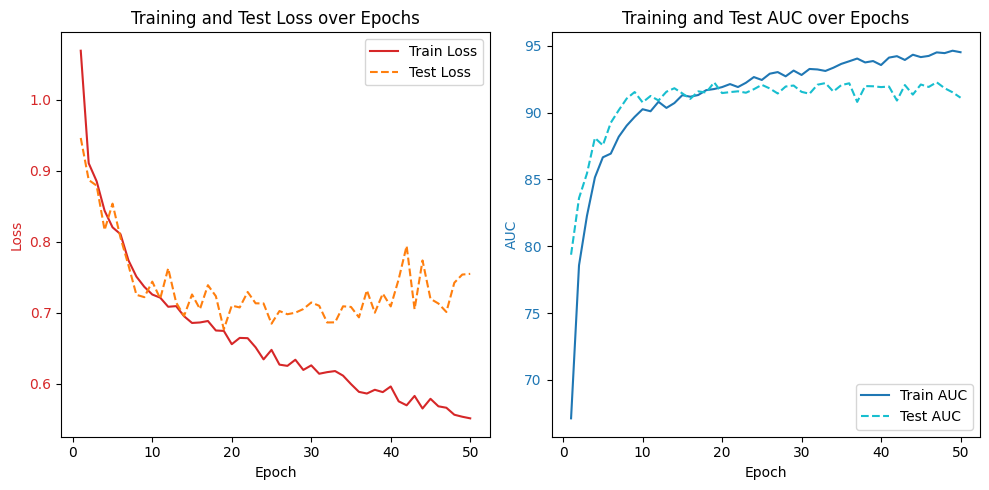

In [60]:
plot_training(training)

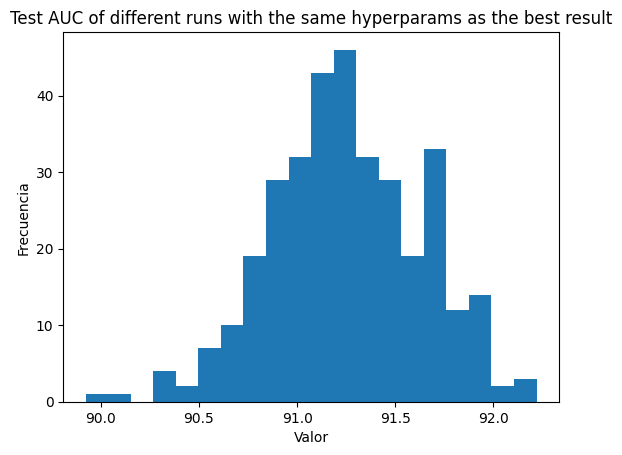

In [61]:
plot_hist(data22)

### Learning rate

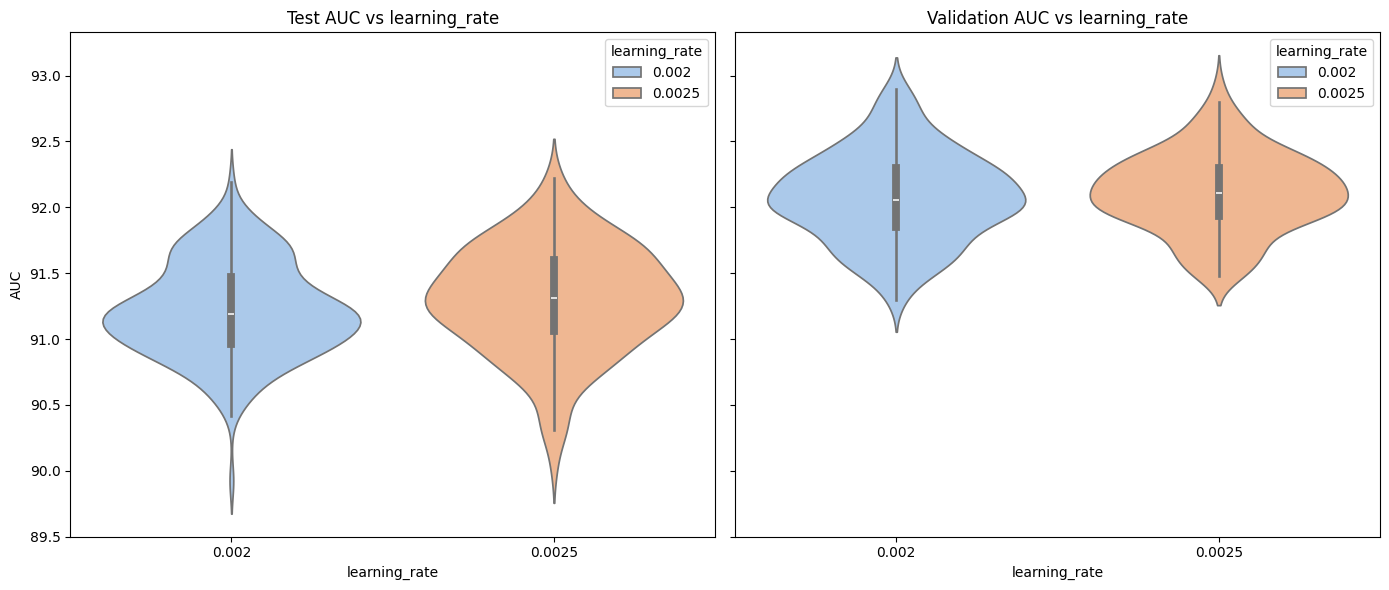

In [62]:
plot_variable(data22, var='learning_rate')

### Hidden sizes

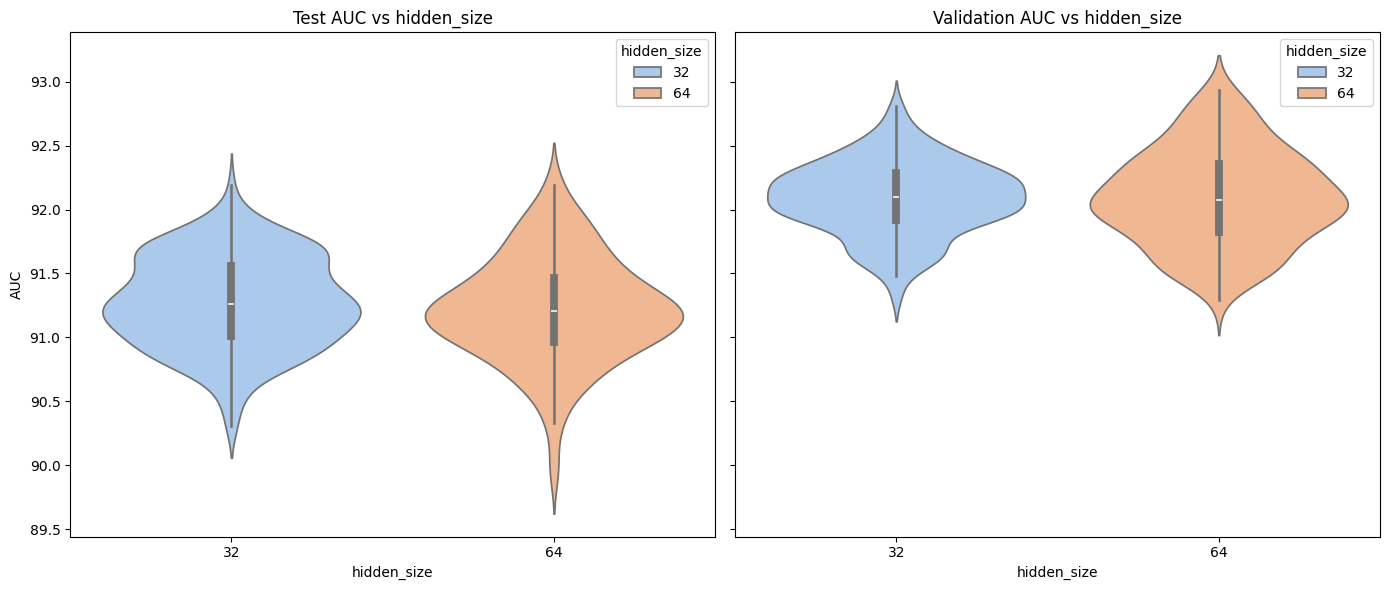

In [63]:
plot_variable(data22, var='hidden_size')

### Dropout

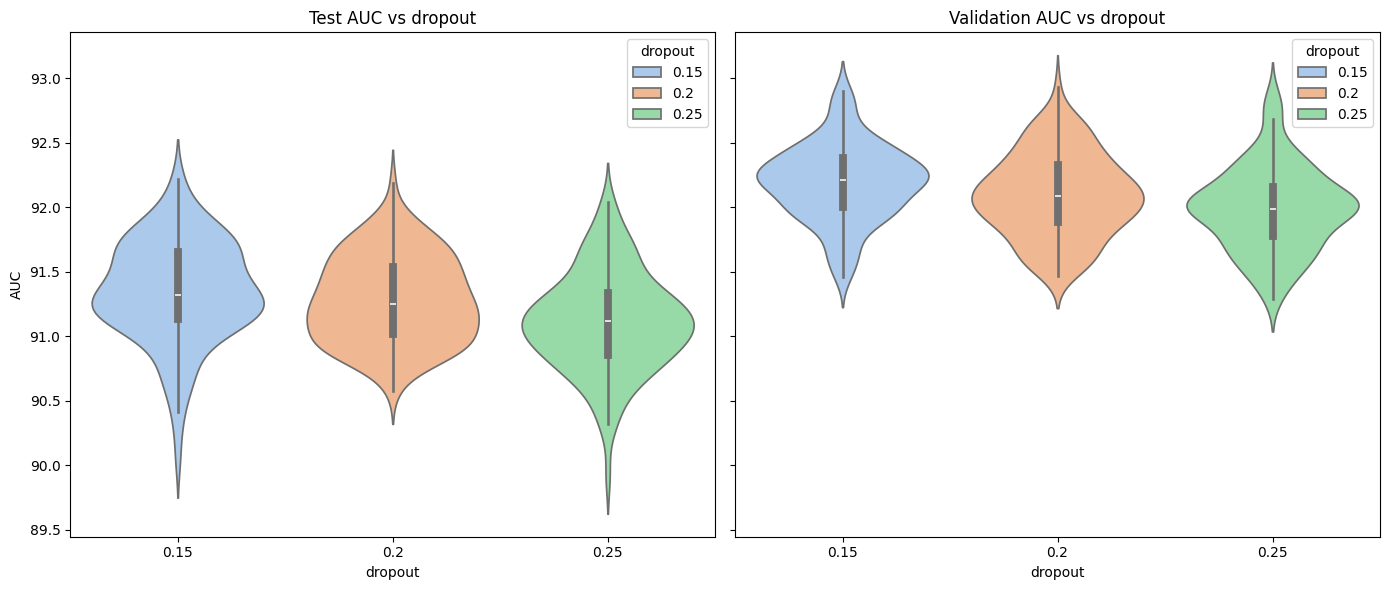

In [64]:
plot_variable(data22, var='dropout')

### Num transformer blocks

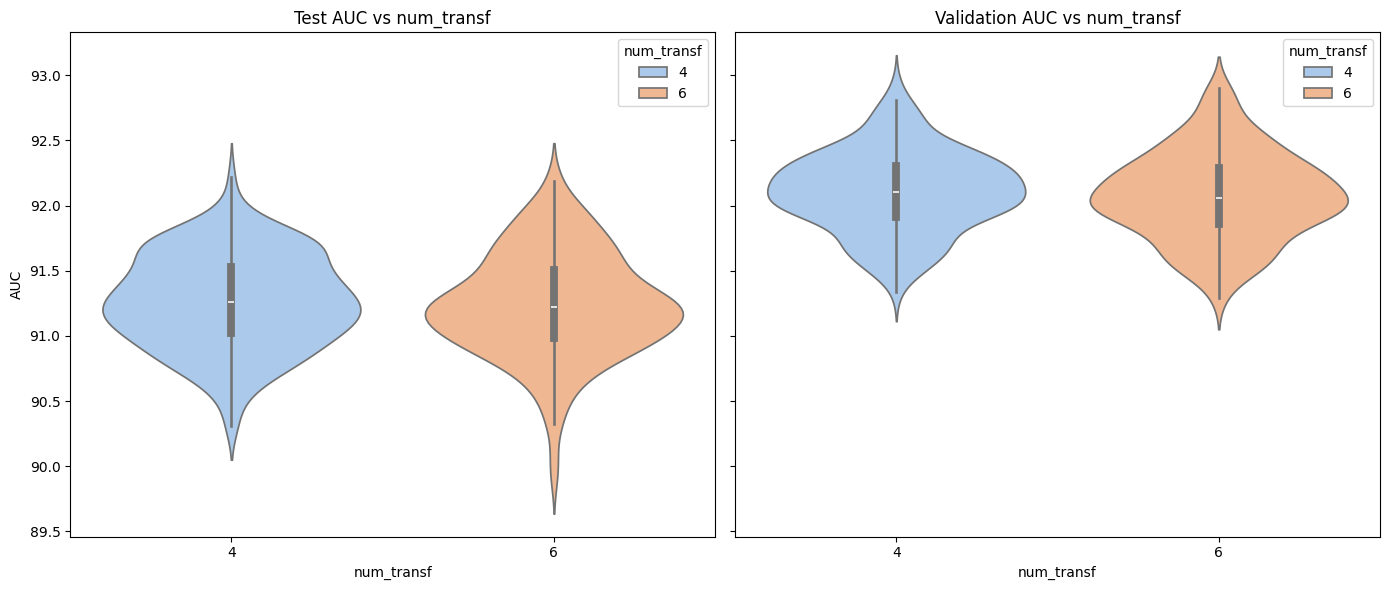

In [65]:
plot_variable(data22, var='num_transf')

### Num heads

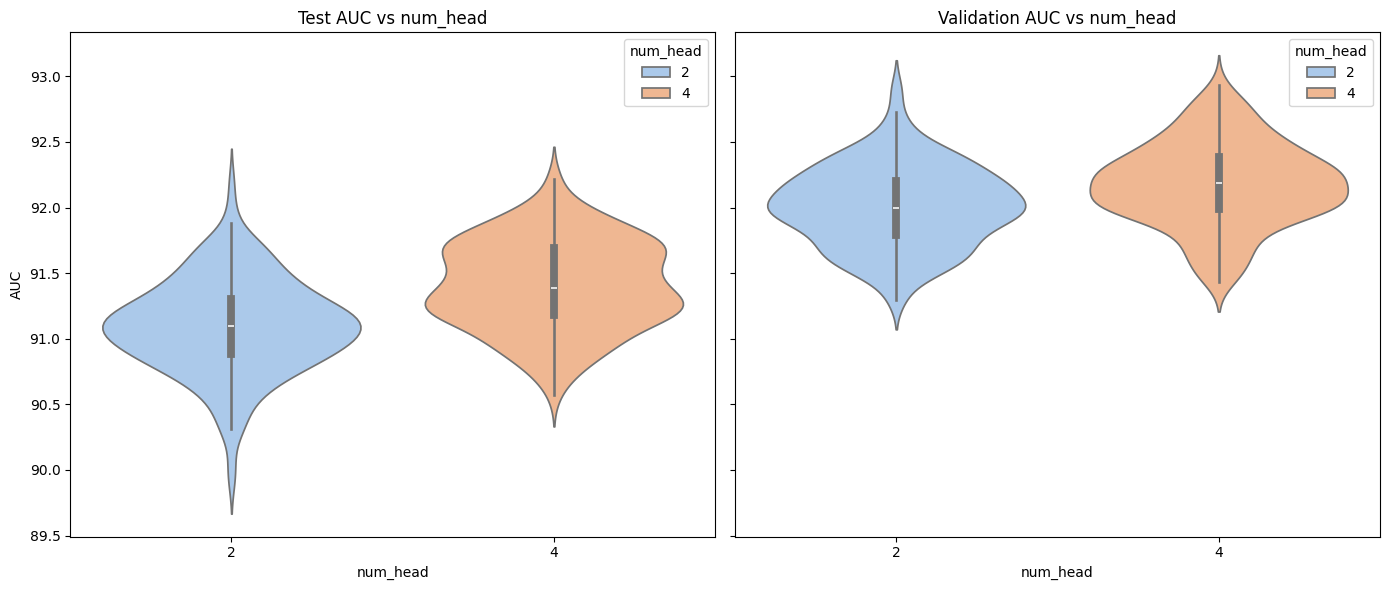

In [66]:
plot_variable(data22, var='num_head')

### MLP size

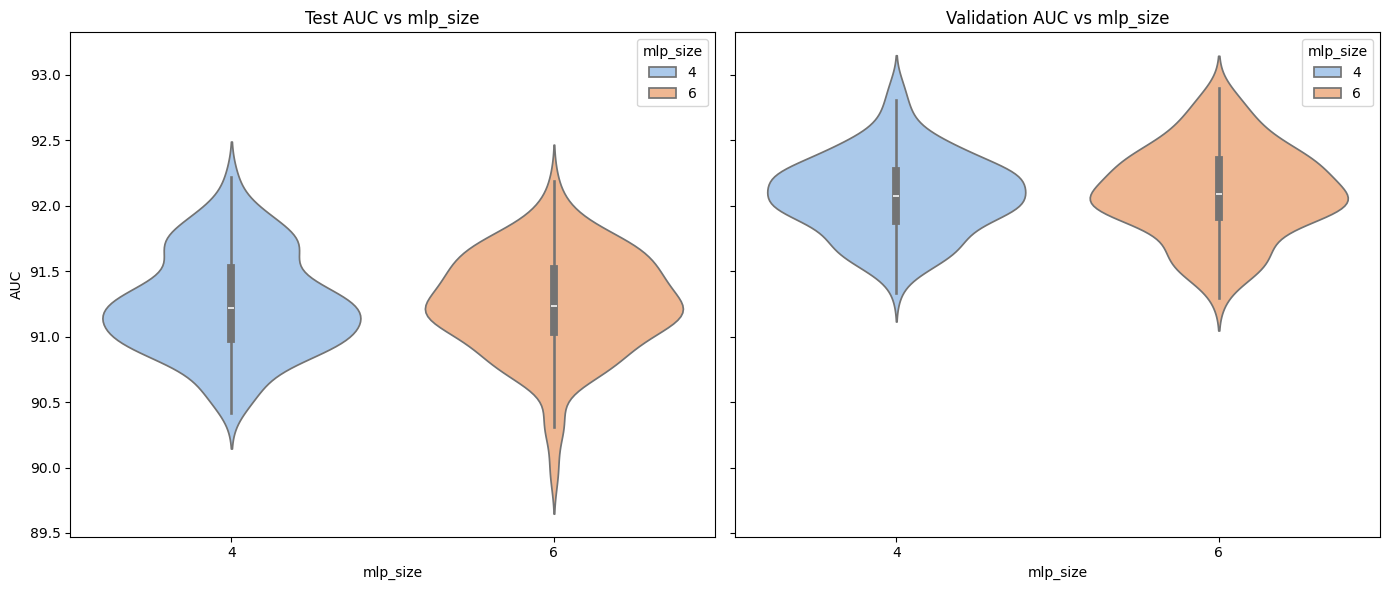

In [67]:
plot_variable(data22, var='mlp_size')

### Patch size

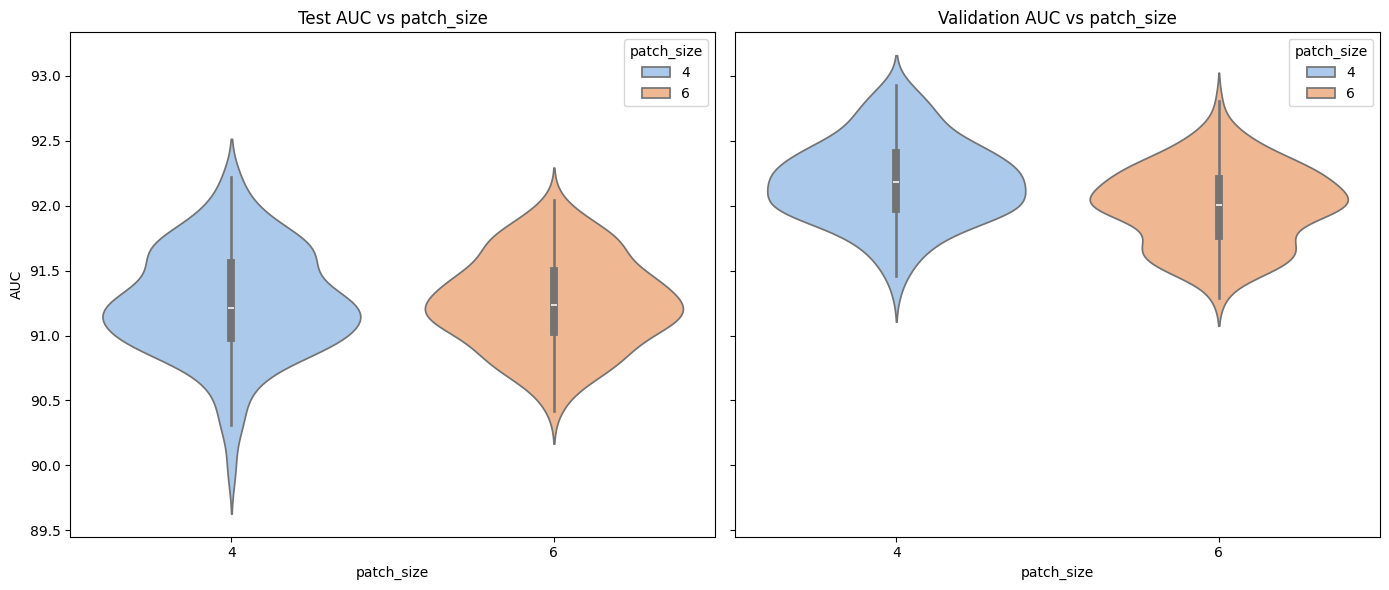

In [68]:
plot_variable(data22, var='patch_size')

### Refined6

In [77]:
data23=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined6/results_grid_search_cq.csv')
data23

,idx,learning_rate,hidden_size,dropout,num_head,num_transf,mlp_size,patch_size,weight_decay,test_auc,test_acc,val_auc,val_acc
0,0,0.0025,16,0.2,4,4,4,4,1.000000e-07,91.157124,74.064838,92.270310,74.875374
1,0,0.0025,16,0.2,4,4,6,4,1.000000e-07,90.853462,73.915212,91.447990,73.280160
2,0,0.0025,32,0.2,4,4,4,4,1.000000e-07,91.644067,74.763092,92.513663,75.573280
3,0,0.0025,32,0.2,4,4,6,4,1.000000e-07,92.090038,75.211970,92.144968,75.772682
4,0,0.0030,16,0.2,4,4,4,4,1.000000e-07,91.045786,73.017456,91.959630,73.678963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,19,0.0025,32,0.2,4,4,6,4,1.000000e-07,91.985075,75.012469,91.875788,74.775673
156,19,0.0030,16,0.2,4,4,4,4,1.000000e-07,91.729849,74.364090,91.995117,73.379860
157,19,0.0030,16,0.2,4,4,6,4,1.000000e-07,91.257719,74.513716,91.889127,75.672981
158,19,0.0030,32,0.2,4,4,4,4,1.000000e-07,91.802705,73.316708,92.308496,74.675972


In [78]:
max_value = data23['test_auc'].max()
print(max_value)
max_ind = data23['test_auc'].idxmax()
max_row = data23.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

92.09003802338304
Fila con el valor máximo en test_auc:
idx              0.000000e+00
learning_rate    2.500000e-03
hidden_size      3.200000e+01
dropout          2.000000e-01
num_head         4.000000e+00
num_transf       4.000000e+00
mlp_size         6.000000e+00
patch_size       4.000000e+00
weight_decay     1.000000e-07
test_auc         9.209004e+01
test_acc         7.521197e+01
val_auc          9.214497e+01
val_acc          7.577268e+01
Name: 3, dtype: float64


In [79]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [80]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined6/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

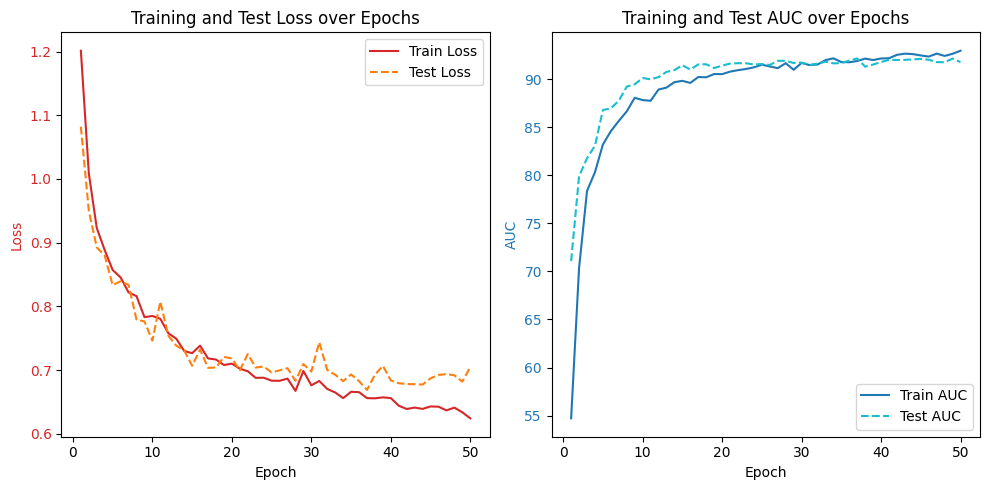

In [81]:
plot_training(training)

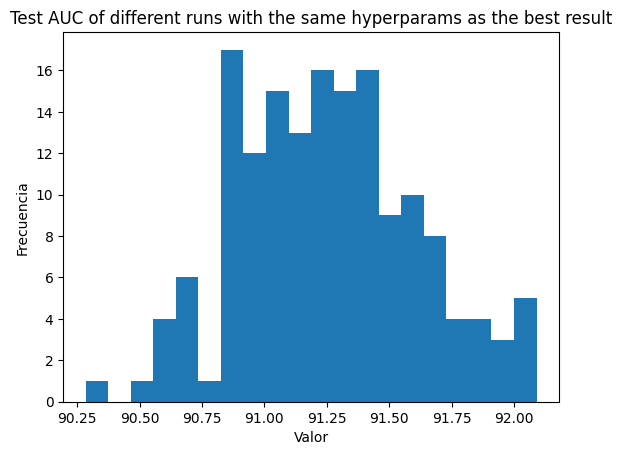

In [82]:
plot_hist(data23)

### Refined7

In [90]:
data24=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined7/results_grid_search_cq.csv')
data24

,idx,learning_rate,hidden_size,dropout,num_head,num_transf,mlp_size,patch_size,weight_decay,test_auc,test_acc,val_auc,val_acc
0,0,0.0025,32,0.2,4,4,4,4,1.000000e-07,90.958533,73.167082,92.370503,73.678963
1,0,0.0025,32,0.2,4,4,6,4,1.000000e-07,92.060706,76.009975,93.085391,76.370887
2,0,0.0025,64,0.2,4,4,4,4,1.000000e-07,91.000196,74.463840,92.062653,75.274177
3,0,0.0025,64,0.2,4,4,6,4,1.000000e-07,91.805669,75.810474,92.893556,75.872383
4,1,0.0025,32,0.2,4,4,4,4,1.000000e-07,91.487843,74.264339,92.122018,74.376869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,20,0.0025,64,0.2,4,4,4,4,1.000000e-07,91.087760,73.266833,92.052422,72.681954
83,20,0.0025,64,0.2,4,4,6,4,1.000000e-07,91.305119,71.770574,92.155103,73.579262
84,21,0.0025,32,0.2,4,4,4,4,1.000000e-07,91.940932,75.810474,92.694188,75.972084
85,21,0.0025,32,0.2,4,4,6,4,1.000000e-07,92.243323,74.513716,92.709089,75.772682


In [91]:
max_value = data24['test_auc'].max()
print(max_value)
max_ind = data24['test_auc'].idxmax()
max_row = data24.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

92.42583239449064
Fila con el valor máximo en test_auc:
idx              1.500000e+01
learning_rate    2.500000e-03
hidden_size      3.200000e+01
dropout          2.000000e-01
num_head         4.000000e+00
num_transf       4.000000e+00
mlp_size         6.000000e+00
patch_size       4.000000e+00
weight_decay     1.000000e-07
test_auc         9.242583e+01
test_acc         7.521197e+01
val_auc          9.280515e+01
val_acc          7.567298e+01
Name: 61, dtype: float64


In [92]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/derma_results/results_cq_refined7/grid_search{index}/Training_{lr}_{int(hs)}_{dr}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

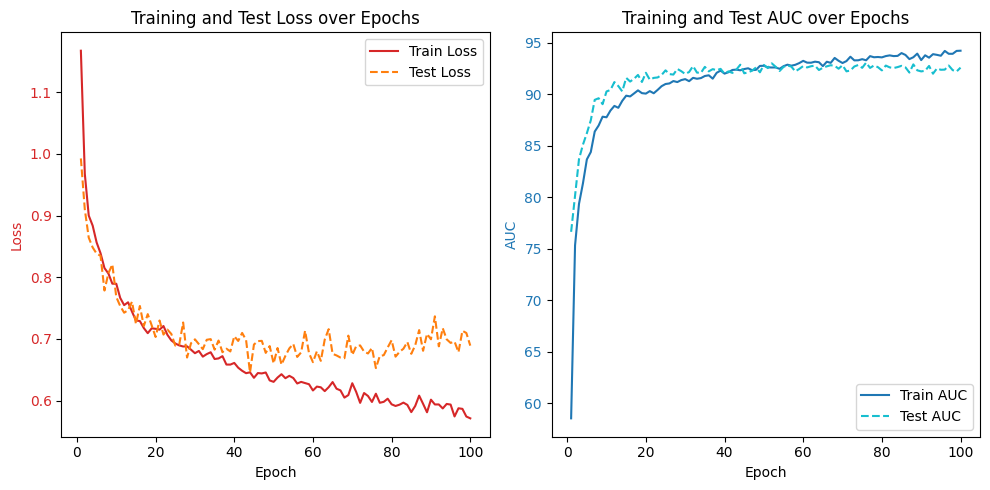

In [93]:
plot_training(training)

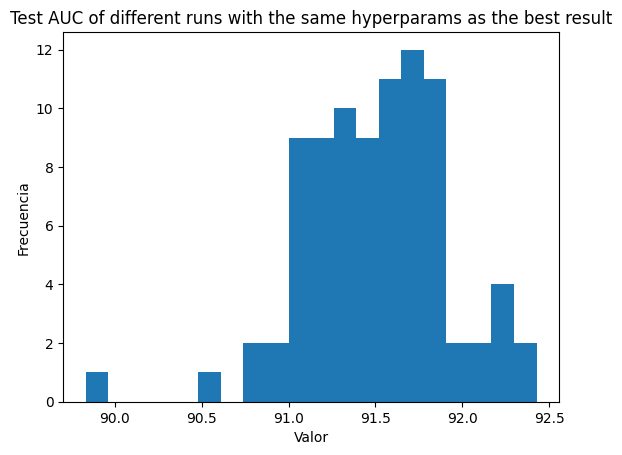

In [94]:
plot_hist(data24)

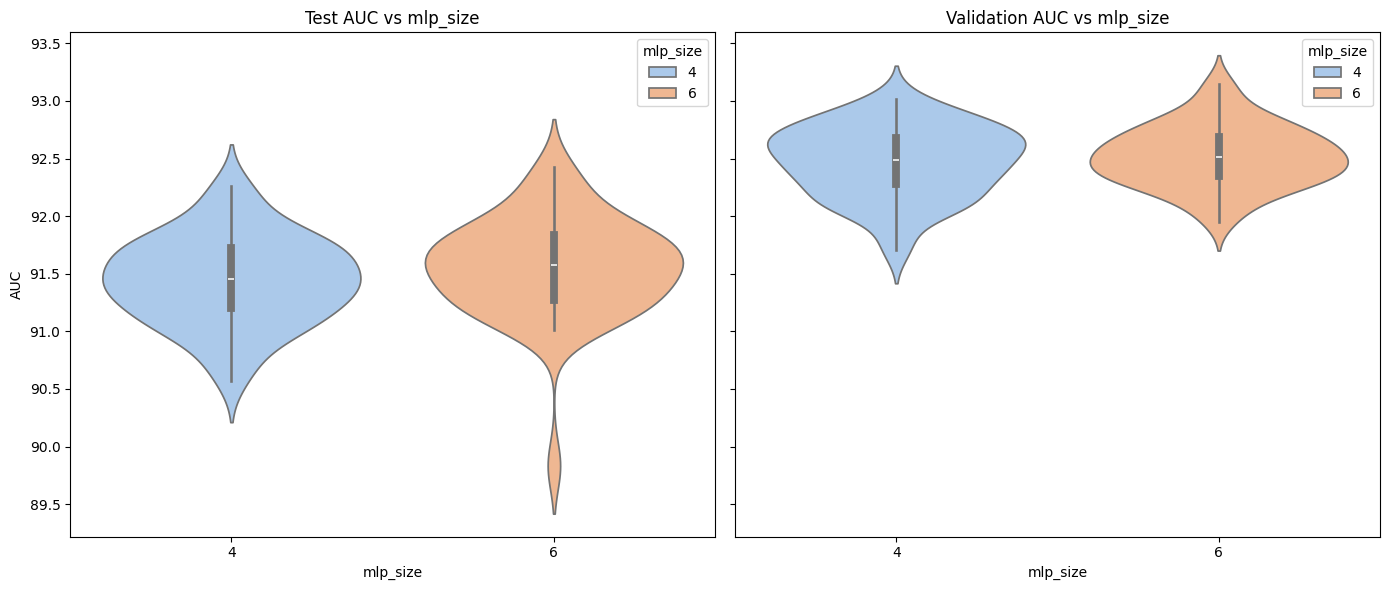

In [95]:
plot_variable(data24, var='mlp_size')

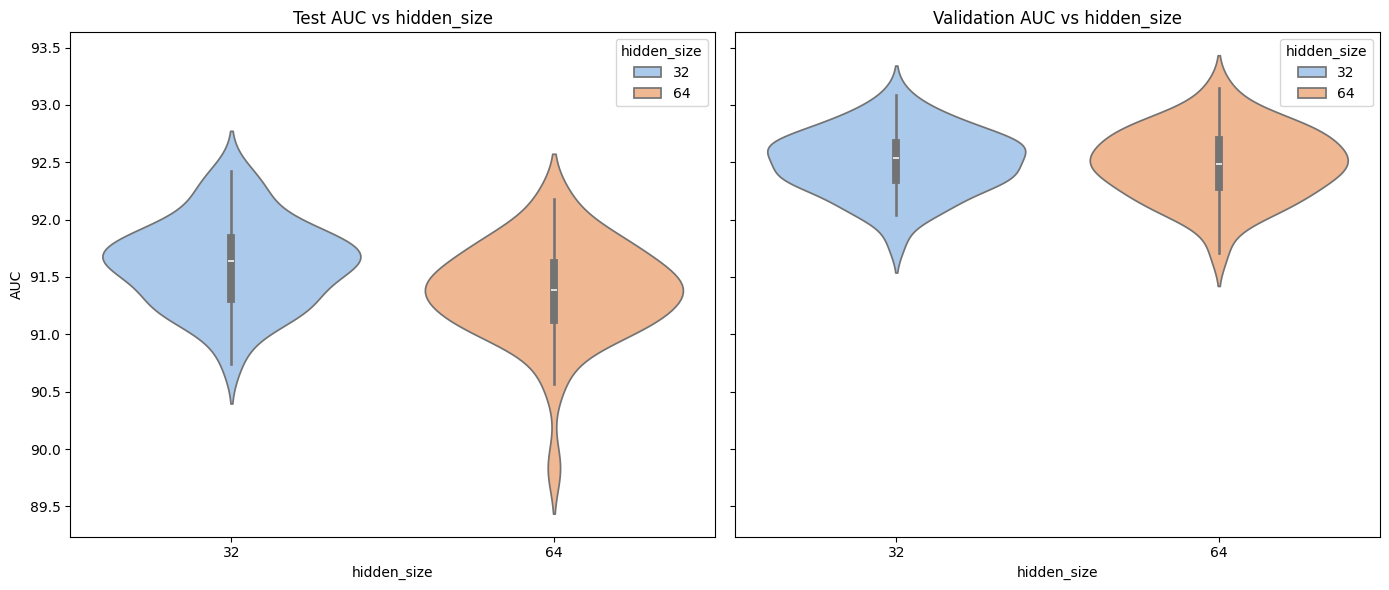

In [96]:
plot_variable(data24, var='hidden_size')

# Classical Transformer with quantum data

In [ ]:
data2=pd.read_csv('D:/AjuDoctor/Articles/QuantumTransformer/breast_results/results_qc/results_grid_search_qc.csv')
data2

In [ ]:
max_value = data2['test_auc'].max()
print(max_value)
max_ind = data2['test_auc'].idxmax()
max_row = data2.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

In [ ]:
index=int(max_row['idx'])
lr=max_row['learning_rate']
hs=max_row['hidden_size']
dr=max_row['dropout']
nh=max_row['num_head']
nt=max_row['num_transf']
mlp=max_row['mlp_size']
ps=max_row['patch_size']
wd=max_row['weight_decay']

In [ ]:
training=pd.read_csv(f'D:/AjuDoctor/Articles/QuantumTransformer/breast_results/results_qc/grid_search{index}/Training_{"{:.4f}".format(lr)}_{int(hs)}_{"{:.2f}".format(dr)}_{int(nh)}_{int(nt)}_{int(mlp)}_{int(ps)}_{wd}.csv')

In [ ]:
# Assuming these lists contain the training loss and AUC values for each epoch
train_loss = training['trainlosslist']  # List of loss values
train_auc = training['trauclist']   
test_loss = training['vallosslist']  # List of loss values
test_auc = training['auclist']  

# Crear la figura con dos subgráficos (dos filas, una columna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de pérdida (loss)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(1, len(train_loss) + 1), train_loss, color='tab:red', label='Train Loss')
ax1.plot(range(1, len(test_loss) + 1), test_loss, color='tab:orange', label='Test Loss', linestyle='--')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc="upper right")
ax1.set_title('Training and Test Loss over Epochs')

# Gráfico de AUC
ax2.set_xlabel('Epoch')
ax2.set_ylabel('AUC', color='tab:blue')
ax2.plot(range(1, len(train_auc) + 1), train_auc, color='tab:blue', label='Train AUC')
ax2.plot(range(1, len(test_auc) + 1), test_auc, color='tab:cyan', label='Test AUC', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc="lower right")
ax2.set_title('Training and Test AUC over Epochs')

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Crear el histograma
plot_hist(data2)

In [ ]:
# Crear el histograma
data = data2[(data2['learning_rate'] == lr) & (data2['hidden_size'] == hs) & (data2['dropout'] == dr) & (data2['num_head'] == nh)]
data=data2
plt.hist(data['test_auc'], bins=20)
plt.title("Test AUC of different runs with the same hyperparams as the best result")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
second_largest = data2['test_auc'].nlargest(2).iloc[-1]
print(second_largest)
max_ind = data2[data2['test_auc'] == second_largest].index[0]
max_row = data2.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

In [ ]:
third_largest = data2['test_auc'].nlargest(3).iloc[-1]
print(third_largest)
max_ind = data2[data2['test_auc'] == second_largest].index[0]
max_row = data2.loc[max_ind]
print("Fila con el valor máximo en test_auc:")
print(max_row)

### Learning rate

In [ ]:
# Create a violin plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Primer violín: Test AUC
sns.violinplot(ax=axes[0], x='learning_rate', y='test_auc', hue='learning_rate', data=data2, palette="pastel")
axes[0].set_title("Test AUC vs Learning Rate")
axes[0].set_ylabel("AUC vs Learning Rate")

# Segundo violín: Validation AUC
sns.violinplot(ax=axes[1], x='learning_rate', y='val_auc', hue='learning_rate', data=data2, palette="pastel")
axes[1].set_title("Validation AUC vs Learning Rate")
axes[1].set_ylabel("AUC vs Learning rate")

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

### Dropout

In [ ]:
# Create a violin plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Primer violín: Test AUC
sns.violinplot(ax=axes[0], x='dropout', y='test_auc', hue='dropout', data=data2, palette="pastel")
axes[0].set_title("Test AUC vs Dropout")
axes[0].set_ylabel("AUC vs Dropout")

# Segundo violín: Validation AUC
sns.violinplot(ax=axes[1], x='dropout', y='val_auc', hue='dropout', data=data2, palette="pastel")
axes[1].set_title("Validation AUC vs Dropout")
axes[1].set_ylabel("AUC vs Dropout")

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

### Weight decay

In [ ]:
# Create a violin plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Primer violín: Test AUC
sns.violinplot(ax=axes[0], x='weight_decay', y='test_auc', hue='weight_decay', data=data2, palette="pastel")
axes[0].set_title("Test AUC vs Learning Rate")
axes[0].set_ylabel("AUC vs Weight Decay")

# Segundo violín: Validation AUC
sns.violinplot(ax=axes[1], x='weight_decay', y='val_auc', hue='weight_decay', data=data2, palette="pastel")
axes[1].set_title("Validation AUC vs Learning Rate")
axes[1].set_ylabel("AUC vs Weight Decay")

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()